# Importing Datasets and Requirements

In [ ]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/')
df = pd.read_csv("/content/drive/MyDrive/station_hour.csv")
df_station = pd.read_csv("/content/drive/MyDrive/stations.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [ ]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389617 entries, 0 to 2389616
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 291.7+ MB


In [ ]:
#Convert Datetime from object dtype to datetime dtype
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389617 entries, 0 to 2389616
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 291.7+ MB


# Visualization

In [ ]:
df.set_index('Datetime', inplace=True)

In [ ]:
daily_mean = df.resample('D').max(numeric_only=True)
daily_mean.drop(columns=['AQI'], inplace=True)

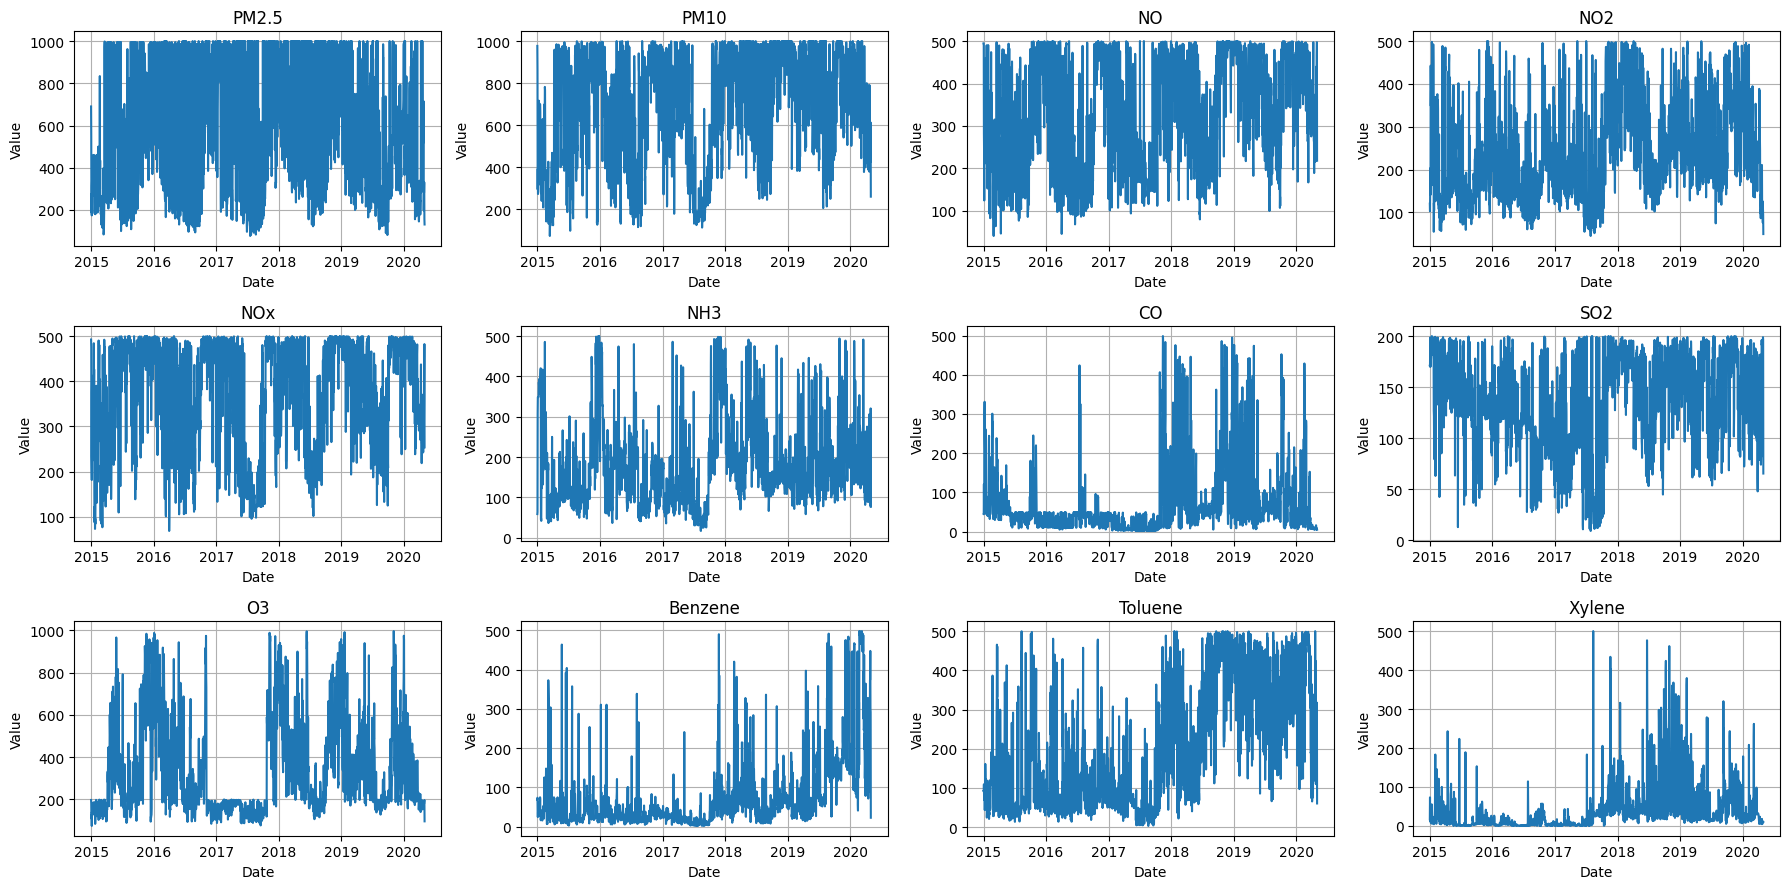

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 9))  # Adjust figsize for better vertical space

for i, column in enumerate(daily_mean.columns):
    row = i // axes.shape[1]
    col = i % axes.shape[1]
    ax = axes[row, col]

    ax.plot(daily_mean.index, daily_mean[column])
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-65-93cd9341865c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M').max(numeric_only=True)


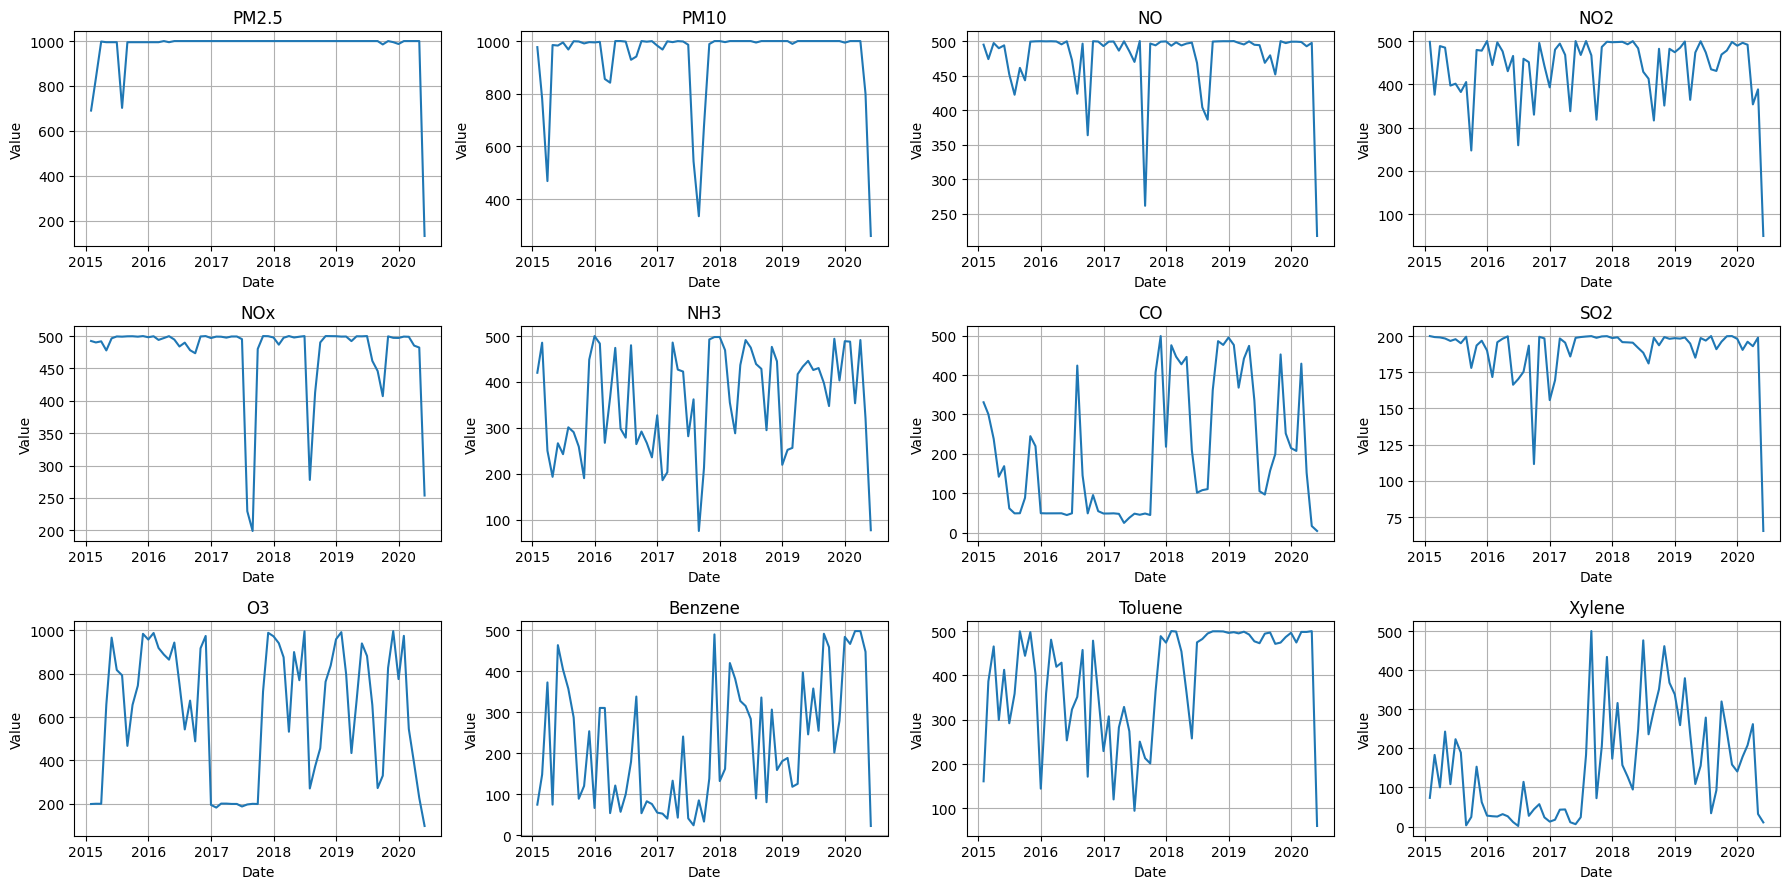

In [ ]:
monthly_mean = df.resample('M').max(numeric_only=True)
monthly_mean.drop(columns=['AQI'], inplace=True)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 9))  # Adjust figsize for better vertical space

for i, column in enumerate(monthly_mean.columns):
    row = i // axes.shape[1]
    col = i % axes.shape[1]
    ax = axes[row, col]

    ax.plot(monthly_mean.index, monthly_mean[column])
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.grid(True)
plt.tight_layout()
plt.show()

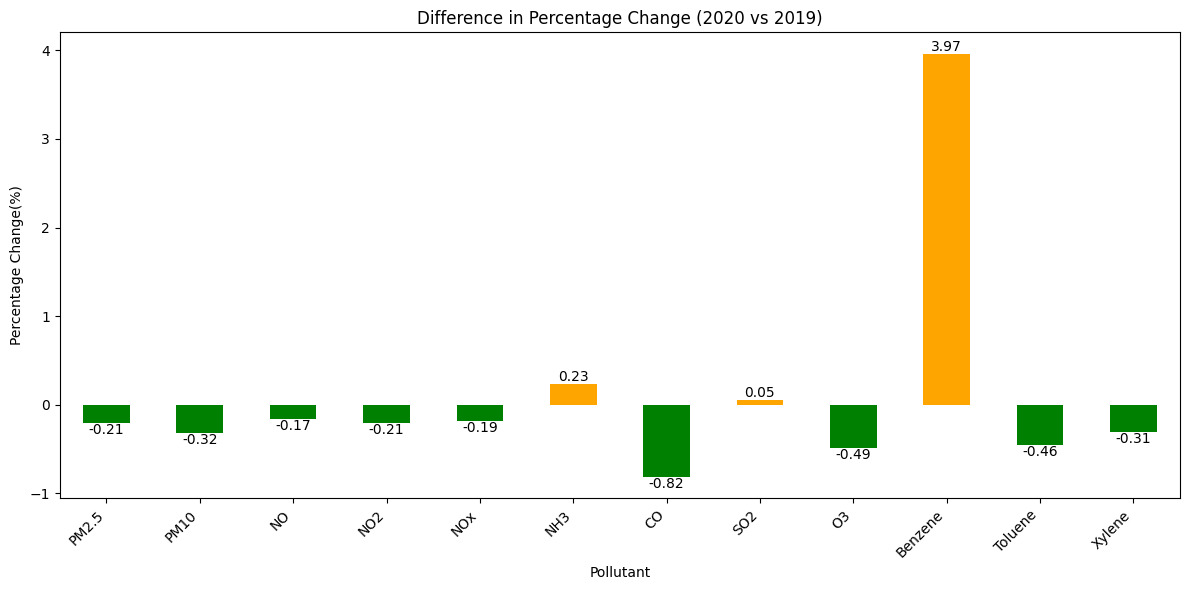

In [ ]:
yearly_percentage_change = daily_mean.pct_change(periods=365)

percentage_change_2020 = yearly_percentage_change[yearly_percentage_change.index >= '2020-03-24']
percentage_change_2020 = percentage_change_2020.mean()

plt.figure(figsize=(12, 6))
ax = percentage_change_2020.plot(kind='bar', color=[
    'orange' if x > 0 else 'green' for x in percentage_change_2020
])
plt.title('Difference in Percentage Change (2020 vs 2019)')
plt.xlabel('Pollutant')
plt.ylabel('Percentage Change(%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels to the bars (optional, but good for clarity)
for i, v in enumerate(percentage_change_2020):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v >= 0 else 'top')

plt.show()

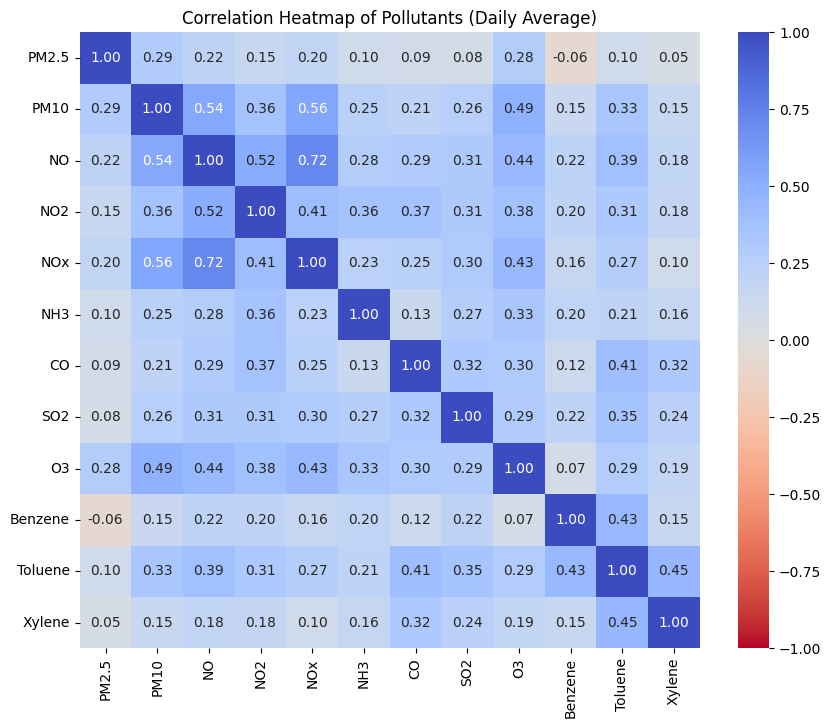

In [ ]:
correlation_matrix = daily_mean.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm_r',
    fmt=".2f",
    vmin=-1,  # Force minimum value of color scale
    vmax=1    # Force maximum value of color scale
)
plt.title('Correlation Heatmap of Pollutants (Daily Average)')
plt.show()

stacked_corr = correlation_matrix.stack()
stacked_corr = stacked_corr[stacked_corr != 1]
max_corr_pair = stacked_corr.abs().idxmax()
max_corr_value = stacked_corr[max_corr_pair]

<ipython-input-71-b2cec88cca81>:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['CO'].pct_change().sum())
<ipython-input-71-b2cec88cca81>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['CO'].pct_change().sum())


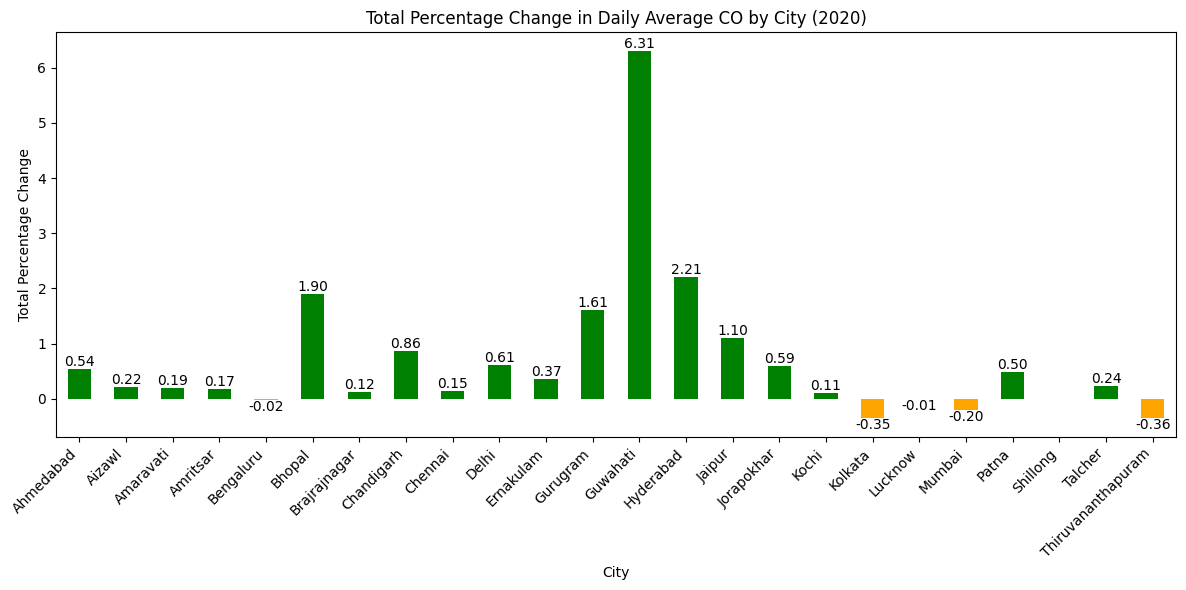

In [ ]:
df = df.reset_index()
merged_df = pd.merge(df, df_station, left_on='StationId', right_on='StationId', how='left')

daily_mean = daily_mean.reset_index()
merged_df_2020 = merged_df[merged_df['Datetime'] >= pd.to_datetime('2020-03-24')].copy()

state_daily_avg_2020 = merged_df_2020.set_index('Datetime').groupby('City')['CO'].resample('D').mean()
state_daily_avg_2020 = state_daily_avg_2020.reset_index()
state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['CO'].pct_change().sum())

plt.figure(figsize=(12, 6))
ax = state_percentage_change_2020.plot(kind='bar', color=[
    'green' if x > 0 else 'orange' for x in state_percentage_change_2020
])
plt.title('Total Percentage Change in Daily Average CO by City (2020)')
plt.xlabel('City')
plt.ylabel('Total Percentage Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(state_percentage_change_2020):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v >= 0 else 'top')

plt.show()

<ipython-input-72-594c5ef82eaf>:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['Benzene'].pct_change().sum())
<ipython-input-72-594c5ef82eaf>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['Benzene'].pct_change().sum())


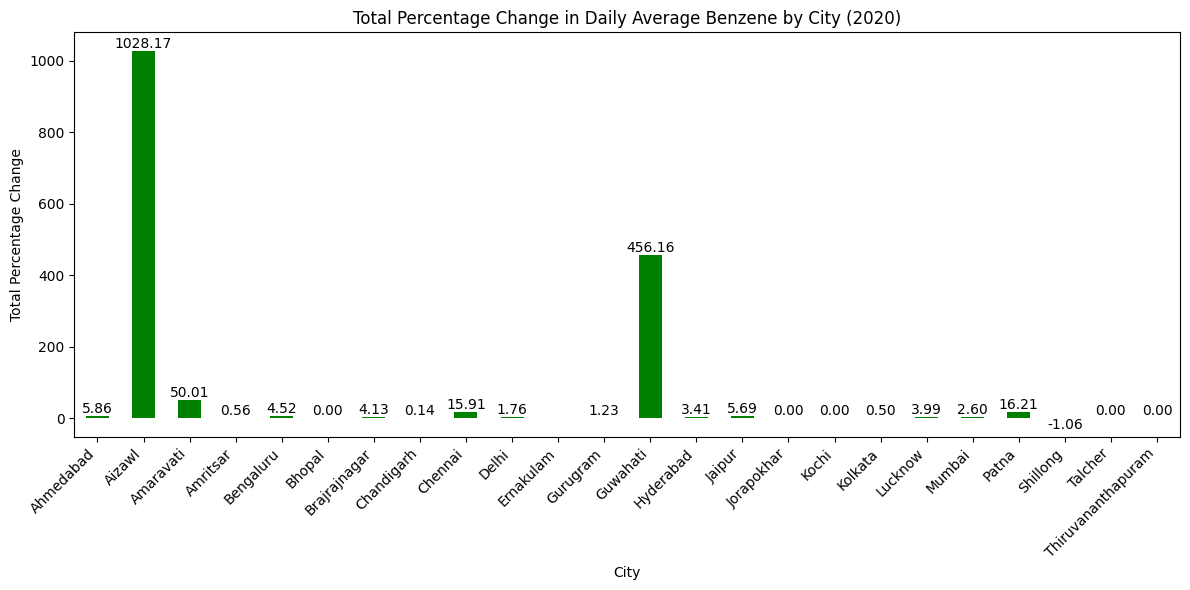

In [ ]:
state_daily_avg_2020 = merged_df_2020.set_index('Datetime').groupby('City')['Benzene'].resample('D').mean()
state_daily_avg_2020 = state_daily_avg_2020.reset_index()
state_percentage_change_2020 = state_daily_avg_2020.groupby('City').apply(lambda x: x['Benzene'].pct_change().sum())

plt.figure(figsize=(12, 6))
ax = state_percentage_change_2020.plot(kind='bar', color=[
    'green' if x > 0 else 'orange' for x in state_percentage_change_2020
])
plt.title('Total Percentage Change in Daily Average Benzene by City (2020)')
plt.xlabel('City')
plt.ylabel('Total Percentage Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(state_percentage_change_2020):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v >= 0 else 'top')

plt.show()